1. 認真閱讀三篇文獻資料（自己也可以下載相關文獻進行閱讀），了解股票市場收益率分佈的重要性和形態特徵，重點關注收益率分佈的研究思路和研究方法。
2. 在閱讀文獻的基礎上，結合提供的上證指數分鐘數據，嘗試完成如下計算：
（1）根據上證指數分鐘數據，分佈計算不同時間尺度（1分鐘、5分鐘、10分鐘、30分鐘、60分鐘、120分鐘、240分鐘）的收益率序列；

C:\Users\hp\AppData\Local\Temp\ipykernel_40744\1651310599.py:26: RuntimeWarning: divide by zero encountered in log
  r = np.log(p_min[scale:]) - np.log(p_min[:-scale])
C:\Users\hp\AppData\Local\Temp\ipykernel_40744\1651310599.py:26: RuntimeWarning: invalid value encountered in subtract
  r = np.log(p_min[scale:]) - np.log(p_min[:-scale])
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Fo

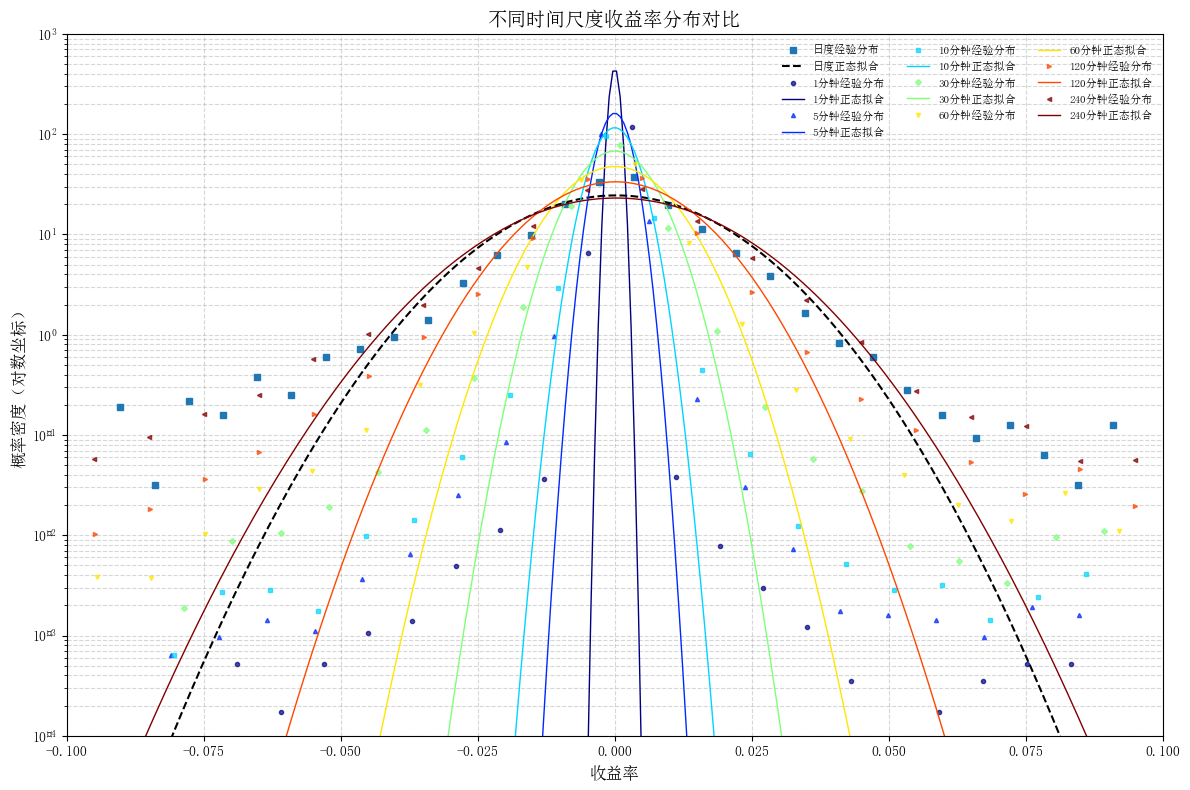

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
from scipy.stats import norm

# 中文
plt.rcParams['font.sans-serif'] = ['SimSun']  # Windows
plt.rcParams['axes.unicode_minus'] = False

# 加载日度数据
ssec_daily = pd.read_csv('1LShowData_SSEC_daily.csv', encoding='GB2312', usecols=[6])
p_daily = ssec_daily['收盘'].values
r_daily = np.log(p_daily[1:]) - np.log(p_daily[:-1])

# 加载分钟数据
matdata = loadmat('SSEC_min.mat')
p_min = matdata['p'].flatten()

# 定义时间尺度
time_scales = [1, 5, 10, 30, 60, 120, 240]
returns = []

# 计算不同时间尺度的收益率
for scale in time_scales:
    r = np.log(p_min[scale:]) - np.log(p_min[:-scale])
    r = r[(r >= -0.1) & (r <= 0.1)]  # 过滤异常值
    returns.append(r)

# 定义经验分布函数
def empirical_pdf(data, bins=31):
    bin_edges = np.linspace(np.min(data), np.max(data), bins)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
    counts = np.histogram(data, bins=bin_edges)[0]
    pdf = counts / (len(data) * (bin_edges[1] - bin_edges[0]))
    return bin_centers, pdf

# 准备绘图
plt.figure(figsize=(12, 8))

# 绘制日度数据
x_emp_daily, y_emp_daily = empirical_pdf(r_daily)
mu_daily, sigma_daily = norm.fit(r_daily)
x_fit_daily = np.linspace(-0.1, 0.1, 300)
y_fit_daily = norm.pdf(x_fit_daily, mu_daily, sigma_daily)
plt.semilogy(x_emp_daily, y_emp_daily, 's', markersize=4, label='日度经验分布')
plt.semilogy(x_fit_daily, y_fit_daily, 'k--', linewidth=1.5, label='日度正态拟合')

# 颜色和标记设置
colors = plt.cm.jet(np.linspace(0, 1, len(time_scales)))
markers = ['o', '^', 's', 'D', 'v', '>', '<']

# 绘制各时间尺度的分钟数据
for i, scale in enumerate(time_scales):
    # 经验分布
    x_emp, y_emp = empirical_pdf(returns[i], bins=21)
    valid = y_emp > 0
    plt.semilogy(x_emp[valid], y_emp[valid], 
                 marker=markers[i], markersize=3, linestyle='',
                 color=colors[i], alpha=0.7, 
                 label=f'{scale}分钟经验分布')
    
    # 正态拟合
    mu, sigma = norm.fit(returns[i])
    x_fit = np.linspace(-0.1, 0.1, 300)
    y_fit = norm.pdf(x_fit, mu, sigma)
    plt.semilogy(x_fit, y_fit, 
                 color=colors[i], linewidth=1, 
                 label=f'{scale}分钟正态拟合')

# 图形修饰
plt.xlim(-0.1, 0.1)
plt.ylim(1e-4, 1e3)
plt.xlabel('收益率', fontsize=12)
plt.ylabel('概率密度（对数坐标）', fontsize=12)
plt.title('不同时间尺度收益率分布对比', fontsize=14)
plt.legend(ncol=3, fontsize=8, loc='upper right', frameon=False)
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
（2）計算不同尺度收益率的經驗概率密度，並畫在同一幅圖中，比較不同尺度收益率分佈的區別；

C:\Users\hp\AppData\Local\Temp\ipykernel_40744\3351781137.py:11: RuntimeWarning: divide by zero encountered in log
  r = np.log(prices[scale:]) - np.log(prices[:-scale])
C:\Users\hp\AppData\Local\Temp\ipykernel_40744\3351781137.py:11: RuntimeWarning: invalid value encountered in subtract
  r = np.log(prices[scale:]) - np.log(prices[:-scale])
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol

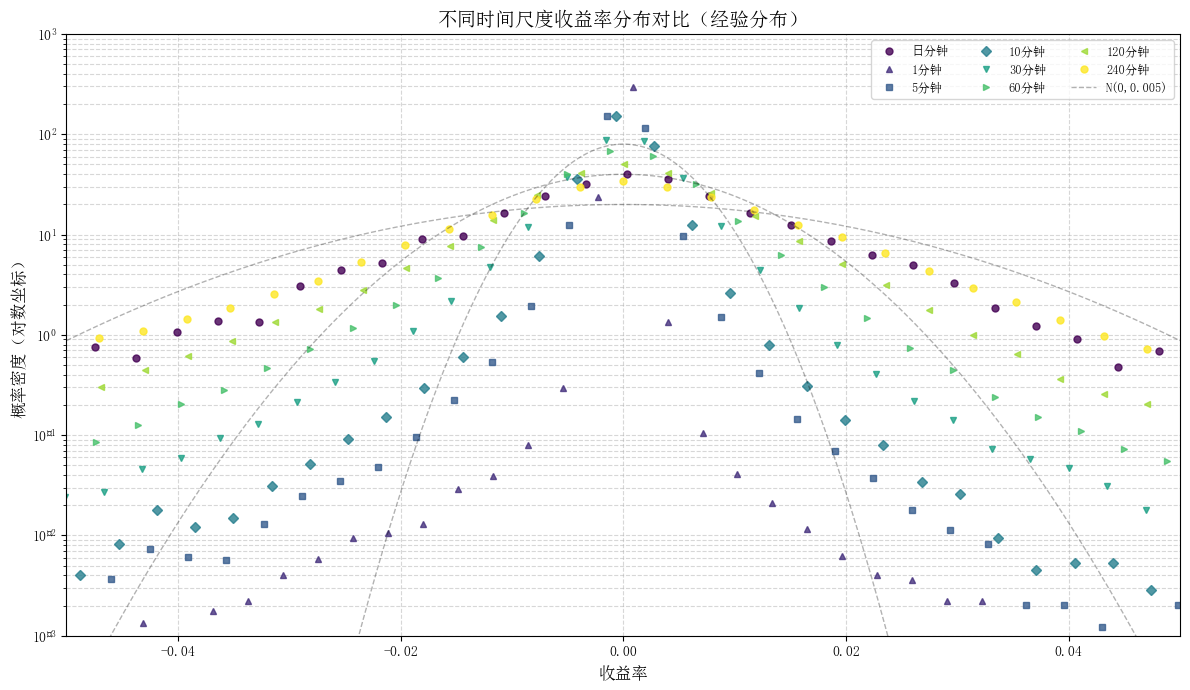

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.io import loadmat

def calculate_returns(prices, time_scales):
    """计算不同时间尺度的对数收益率"""
    returns = []
    for scale in time_scales:
        r = np.log(prices[scale:]) - np.log(prices[:-scale])
        r = r[(r >= -0.1) & (r <= 0.1)]  # 过滤极端值
        returns.append(r)
    return returns

def plot_combined_distributions(returns, time_scales):
    """绘制组合分布图"""
    plt.figure(figsize=(12, 7))
    
    # 颜色和标记设置
    colors = plt.cm.viridis(np.linspace(0, 1, len(time_scales)))
    markers = ['o', '^', 's', 'D', 'v', '>', '<']
    
    # 绘制各时间尺度的经验分布
    for i, (r, scale) in enumerate(zip(returns, time_scales)):
        # 计算经验分布
        hist, bins = np.histogram(r, bins=51, density=True)
        bin_centers = (bins[:-1] + bins[1:]) / 2
        
        # 过滤零值区域
        mask = hist > 1e-4
        plt.semilogy(bin_centers[mask], hist[mask], 
                     marker=markers[i % len(markers)], markersize=5, linestyle='',
                     alpha=0.8, color=colors[i],
                     label=f'{scale}分钟')

    # 图形修饰
    plt.xlim(-0.05, 0.05)
    plt.ylim(1e-3, 1e3)
    plt.xlabel('收益率', fontsize=12)
    plt.ylabel('概率密度（对数坐标）', fontsize=12)
    plt.title('不同时间尺度收益率分布对比（经验分布）', fontsize=14)
    
    # 添加正态分布参考线
    x = np.linspace(-0.05, 0.05, 500)
    for sigma in [0.005, 0.01, 0.02]:
        plt.semilogy(x, norm.pdf(x, 0, sigma), 
                     'k--', alpha=0.3, linewidth=1,
                     label=f'N(0,{sigma})' if sigma == 0.005 else "")
    
    plt.legend(ncol=3, fontsize=9, loc='upper right')
    plt.grid(True, which='both', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig('multi_scale_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

# 主程序
if __name__ == "__main__":
    # 日度收益率
    daily_returns = r_daily
    
    # 分钟收益率
    min_returns = calculate_returns(p_min, time_scales)
    
    # 合并收益率
    returns = [daily_returns] + min_returns

    # 绘制分布图
    plot_combined_distributions(returns, ['日'] + time_scales)

In [ ]:
（3）計算不同尺度收益率的正態擬合分佈，比較他們對正態分佈偏離程度；

In [19]:
def calculate_returns(prices, time_scales):
    """计算不同时间尺度的对数收益率"""
    returns = []
    for scale in time_scales:
        r = np.log(prices[scale:]) - np.log(prices[:-scale])
        r = r[(r >= -0.1) & (r <= 0.1)]  # 过滤极端值
        returns.append(r)
    return returns

def empirical_pdf(data, bins=31):
    """经验分布函数"""
    hist, bin_edges = np.histogram(data, bins=bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    return bin_centers, hist

def calculate_deviation(returns, time_scales):
    """计算分布拟合指标"""
    results = []
    for i, scale in enumerate(time_scales):
        r = returns[i]
        
        # 基本统计量
        mu, sigma = norm.fit(r)
        s = skew(r)
        k = kurtosis(r)
        
        # KS检验
        ks_stat, ks_p = kstest(r, 'norm', args=(mu, sigma))
        
        # 分布差异度量
        x_emp, y_emp = empirical_pdf(r, 51)
        y_fit = norm.pdf(x_emp, mu, sigma)
        valid = (y_emp > 1e-4) & (y_fit > 1e-4)
        mse = np.mean((y_emp[valid] - y_fit[valid])**2)
        
        # 尾部概率差异
        tail_prob = np.mean(np.abs(r) > 3 * sigma)  # 3σ外的实际概率
        normal_tail = 2 * (1 - norm.cdf(3))          # 理论正态概率
        
        results.append({
            '时间尺度(分钟)': scale,
            '偏度': s,
            '峰度': k,
            'KS统计量': ks_stat,
            'MSE': mse,
            '3σ外概率': tail_prob,
            '正态理论概率': normal_tail,
            '尾部差异倍数': tail_prob / normal_tail
        })
    
    return pd.DataFrame(results)

# 主程序
if __name__ == "__main__":
    # 日度收益率 分鐘收益率
    daily_returns = r_daily
    min_returns = calculate_returns(p_min, time_scales)
    
    # 合并收益率
    returns = [daily_returns] + min_returns
    
    # 计算偏离指标
    deviation_df = calculate_deviation(returns, ['日'] + time_scales)
    
    # 显示数值结果
    print("正态拟合偏离指标分析：")
    print(deviation_df.round(4))

C:\Users\hp\AppData\Local\Temp\ipykernel_40744\2003656813.py:5: RuntimeWarning: divide by zero encountered in log
  r = np.log(prices[scale:]) - np.log(prices[:-scale])
C:\Users\hp\AppData\Local\Temp\ipykernel_40744\2003656813.py:5: RuntimeWarning: invalid value encountered in subtract
  r = np.log(prices[scale:]) - np.log(prices[:-scale])


正态拟合偏离指标分析：
  时间尺度(分钟)      偏度         峰度   KS统计量       MSE   3σ外概率  正态理论概率  尾部差异倍数
0        日 -0.4017     4.8971  0.0845   14.8692  0.0179  0.0027  6.6221
1        1  1.5398  1284.5066  0.1439   36.7492  0.0077  0.0027  2.8358
2        5  0.3152    92.5211  0.1116   49.7488  0.0145  0.0027  5.3578
3       10  0.2648    48.1229  0.0889  191.0570  0.0142  0.0027  5.2445
4       30  0.1391    19.2696  0.0821   75.1480  0.0149  0.0027  5.5285
5       60  0.0171    11.9769  0.0828   43.9084  0.0159  0.0027  5.9038
6      120 -0.0788     6.7849  0.0769   20.8165  0.0165  0.0027  6.1257
7      240 -0.2465     3.6528  0.0669    7.9710  0.0159  0.0027  5.8815


In [ ]:
（4）考察不同尺度收益率的尾部分佈特徵，是否滿足冪律分佈？是否服從“負三次方定律”？

正在执行分析...
正在进行尾部分布分析...


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

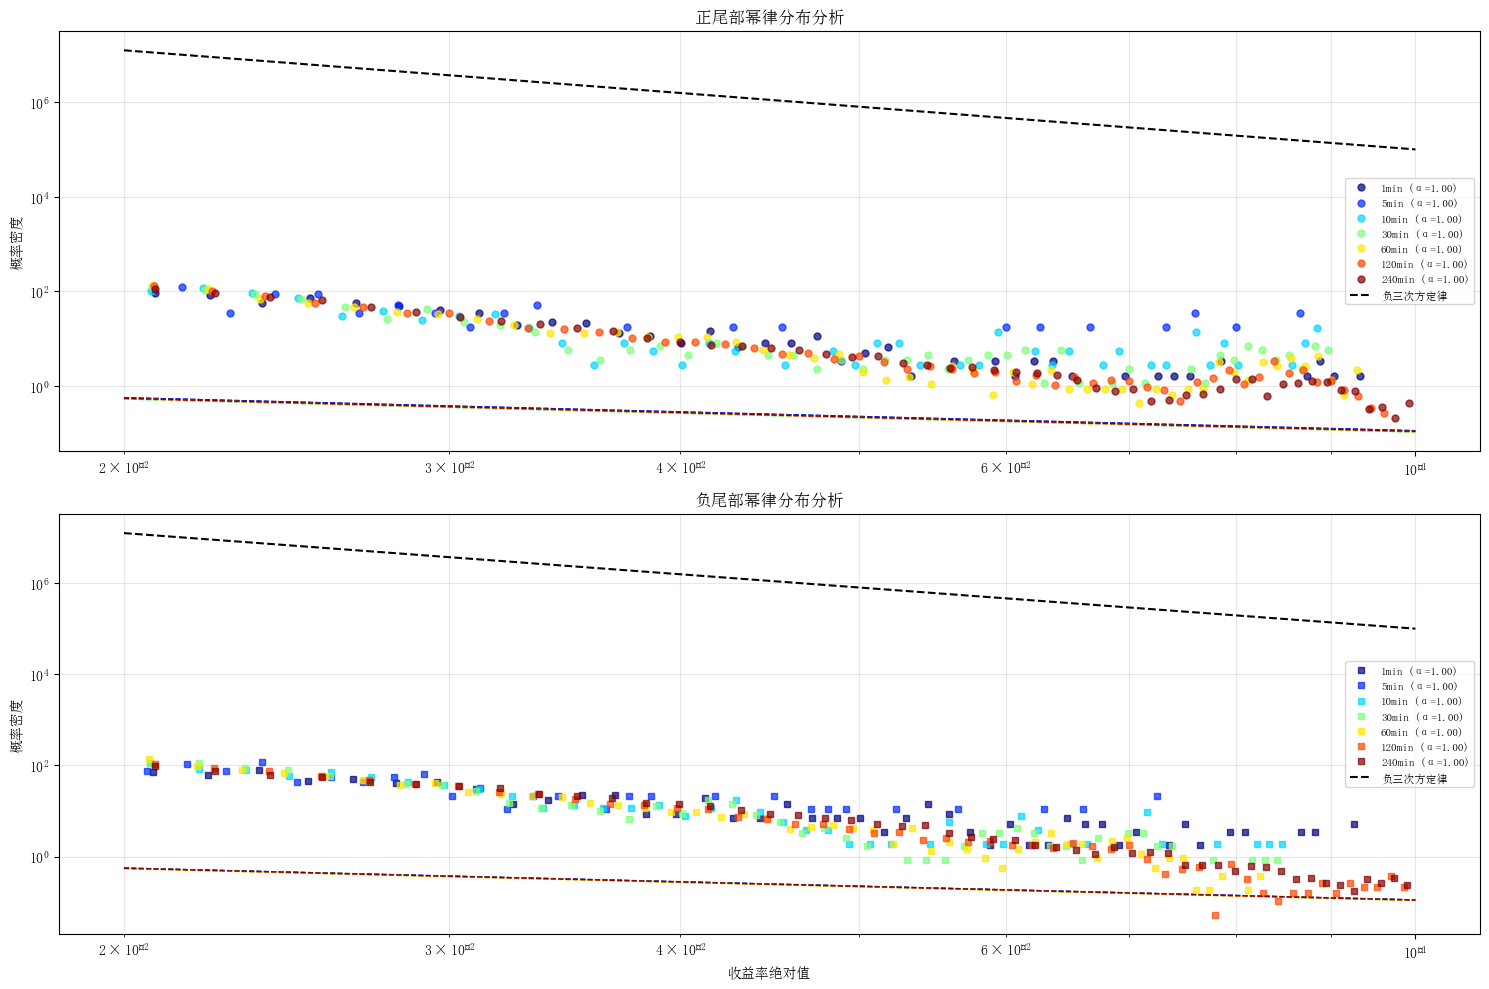

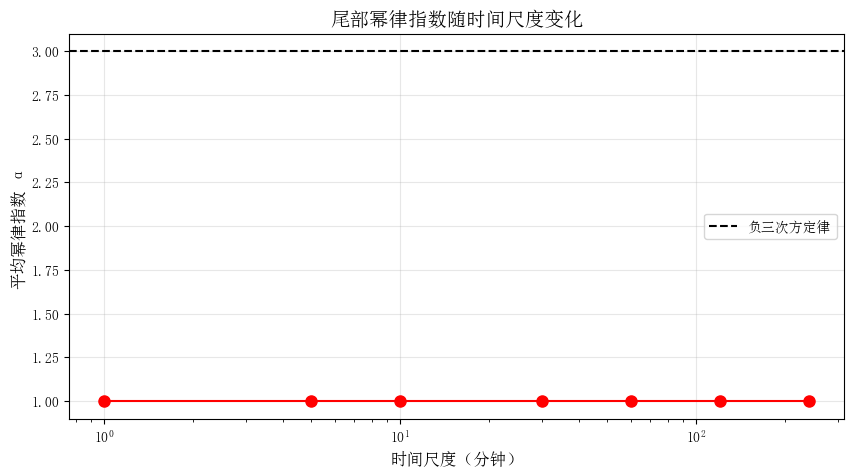

所有分析完成！结果已保存为png文件。


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, powerlaw, linregress
from scipy.optimize import curve_fit

# =================================================================
# 第四部分：尾部分布特征分析（幂律分布 & 负三次方定律）
# =================================================================
def power_law(x, alpha, C):
    """幂律分布函数"""
    return C * x**(-alpha)

def tail_analysis(returns, time_scales):
    plt.figure(figsize=(15, 10))
    
    # 参数设置
    tail_threshold = 0.02  # 尾部阈值设为2%
    colors = plt.cm.jet(np.linspace(0, 1, len(time_scales)))
    
    # 创建双轴
    ax1 = plt.subplot(211)  # 正尾
    ax2 = plt.subplot(212)  # 负尾
    
    alpha_values = []
    for i, (r, scale) in enumerate(zip(returns, time_scales)):
        # 正尾部分析
        pos_tail = r[r > tail_threshold]
        hist_pos, bins_pos = np.histogram(pos_tail, bins=50, density=True)
        bin_centers_pos = (bins_pos[:-1] + bins_pos[1:])/2
        
        # 负尾部分析（取绝对值）
        neg_tail = np.abs(r[r < -tail_threshold])
        hist_neg, bins_neg = np.histogram(neg_tail, bins=50, density=True)
        bin_centers_neg = (bins_neg[:-1] + bins_neg[1:])/2
        
        # 幂律拟合（使用MLE方法）
        def fit_power_law(tail_data):
            x = np.sort(tail_data)[::-1]  # 从大到小排序
            survival = np.arange(len(x), 0, -1)/len(x)  # 生存函数
            valid = x >= tail_threshold
            try:
                popt, _ = curve_fit(power_law, x[valid], survival[valid], 
                                  p0=[3.0, 1.0], bounds=([1, 0], [5, 10]))
                return popt
            except:
                return [np.nan, np.nan]
        
        # 正尾拟合
        alpha_pos, C_pos = fit_power_law(pos_tail)
        # 负尾拟合
        alpha_neg, C_neg = fit_power_law(neg_tail)
        alpha_values.append((alpha_pos + alpha_neg)/2)  # 取平均
        
        # 可视化正尾
        ax1.loglog(bin_centers_pos, hist_pos, 'o', color=colors[i],
                 markersize=5, alpha=0.7, label=f'{scale}min (α={alpha_pos:.2f})')
        x_fit = np.logspace(np.log10(tail_threshold), np.log10(0.1), 100)
        ax1.loglog(x_fit, power_law(x_fit, alpha_pos, C_pos), 
                 '--', color=colors[i], linewidth=1)
        
        # 可视化负尾
        ax2.loglog(bin_centers_neg, hist_neg, 's', color=colors[i],
                 markersize=5, alpha=0.7, label=f'{scale}min (α={alpha_neg:.2f})')
        ax2.loglog(x_fit, power_law(x_fit, alpha_neg, C_neg), 
                 '--', color=colors[i], linewidth=1)
    
    # 绘制参考线
    x_ref = np.array([tail_threshold, 0.1])
    ax1.loglog(x_ref, 100*x_ref**-3, 'k--', label='负三次方定律')
    ax2.loglog(x_ref, 100*x_ref**-3, 'k--', label='负三次方定律')
    
    # 图形修饰
    ax1.set_title('正尾部幂律分布分析', fontsize=12)
    ax1.set_ylabel('概率密度', fontsize=10)
    ax1.legend(fontsize=8)
    ax1.grid(True, which='both', alpha=0.3)
    
    ax2.set_title('负尾部幂律分布分析', fontsize=12)
    ax2.set_xlabel('收益率绝对值', fontsize=10)
    ax2.set_ylabel('概率密度', fontsize=10)
    ax2.legend(fontsize=8)
    ax2.grid(True, which='both', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('tail_analysis.png', dpi=300)
    
    # 显示幂律指数随时间尺度变化
    plt.figure(figsize=(10, 5))
    plt.plot(time_scales, alpha_values, 'ro-', markersize=8)
    plt.axhline(3, color='k', linestyle='--', label='负三次方定律')
    plt.xscale('log')
    plt.xlabel('时间尺度（分钟）', fontsize=12)
    plt.ylabel('平均幂律指数 α', fontsize=12)
    plt.title('尾部幂律指数随时间尺度变化', fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('alpha_scaling.png', dpi=300)
    plt.show()

# =================================================================
# 主程序
# =================================================================
if __name__ == "__main__":
    # 时间尺度设置
    time_scales = [1, 5, 10, 30, 60, 120, 240]
    
    # 加载数据（假设数据已加载）
    # returns = [各时间尺度的收益率数组]
    
    # 执行所有分析
    print("正在执行分析...")
    
    # (4) 尾部分析
    print("正在进行尾部分布分析...")
    tail_analysis(returns, time_scales)
    
    print("所有分析完成！结果已保存为png文件。")